In [1]:
#IMporting the Dataset
import numpy as np     #To calculate mean and Standard Deviation
import pandas as pd    #To load and manuplate the data for one-hot encoding
import matplotlib.pyplot as plt  #To draw Graph
 
from sklearn.tree import DecisionTreeClassifier  #To build a classification tree
from sklearn.tree import plot_tree  #To draw a classification tree
from sklearn.model_selection import train_test_split  #To split the data into training and test data set
from sklearn.model_selection import cross_val_score   #For cross validation
from sklearn.metrics import confusion_matrix         #To create confusion matrix
from sklearn.metrics import plot_confusion_matrix    #To draw confusion matrix


# Import the Data

In [2]:
df=pd.read_csv('car_evaluation.csv',header=None)

# Exploratory Data Analysis

In [3]:
df.shape

(1728, 7)

In [4]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [5]:
#Chaning the columns numbers with column names
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

# Missing Data part-1: Identifying the missing data


In [9]:
df.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

In [10]:
#Checking the missing values are present or not in variable
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

# Declare the Feature Vector and target variable

In [11]:
X=df.drop(['class'],axis=1)
y=df['class']
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object

# Format Data part 1:Spliting the data into test and Trainig Dataset

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=44)

In [13]:
X_train.shape,X_test.shape

((1157, 6), (571, 6))

# Feature Engineering

In [14]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [15]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
769,high,low,2,4,med,med
1141,med,med,4,2,big,med
1358,low,vhigh,4,2,big,high
248,vhigh,med,3,2,med,high
1350,low,vhigh,4,2,small,low


In [16]:
import category_encoders as ce

In [17]:
#Encode variable with ordinal encoding
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])

X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [18]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
769,1,1,1,1,1,1
1141,2,2,2,2,2,1
1358,3,3,2,2,2,2
248,4,2,3,2,1,2
1350,3,3,2,2,3,3


In [19]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1095,2,2,1,1,2,3
776,1,1,1,3,3,2
1080,2,2,1,2,3,3
1156,2,2,2,3,1,1
812,1,1,2,2,3,2


Now we have training and test set for model building

# Decision Tree Classifier with  criterion gini index 

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
#Initiate the model with criterion gini index
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)

clf_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

# Predict the test set result with criterion gini index

In [22]:
y_pred_gini=clf_gini.predict(X_test)

# Check accuracy score with criterion gini index

In [23]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion Gini index: {0:0.4f}'.format(accuracy_score(y_test,y_pred_gini)))

Model accuracy score with criterion Gini index: 0.7653


# Compare  the train-set and test-set accuracy

In [24]:
y_pred_train_gini=clf_gini.predict(X_train)
y_pred_train_gini

print('Train_set accuracy score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_gini)))

Train_set accuracy score:0.8047


# Check for Overfitting and Underfitting 

In [25]:
# print the score of training and test set
print('Training set score:{:.4f}'.format(clf_gini.score(X_train,y_train)))

print('Test score:{:.4f}'.format(clf_gini.score(X_test,y_test)))

Training set score:0.8047
Test score:0.7653


# Visualising the Decision Tree

[Text(418.5, 380.52, 'X[5] <= 2.5\ngini = 0.449\nsamples = 1157\nvalue = [255, 43, 818, 41]'),
 Text(334.8, 271.8, 'X[3] <= 1.5\ngini = 0.573\nsamples = 765\nvalue = [255, 43, 426, 41]'),
 Text(167.4, 163.07999999999998, 'X[0] <= 3.5\ngini = 0.603\nsamples = 242\nvalue = [133, 22, 69, 18]'),
 Text(83.7, 54.360000000000014, 'gini = 0.583\nsamples = 185\nvalue = [111, 22, 34, 18]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.474\nsamples = 57\nvalue = [22, 0, 35, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[3] <= 2.5\ngini = 0.476\nsamples = 523\nvalue = [122, 21, 357, 23]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 271\nvalue = [0, 0, 271, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.634\nsamples = 252\nvalue = [122, 21, 86, 23]'),
 Text(502.20000000000005, 271.8, 'gini = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

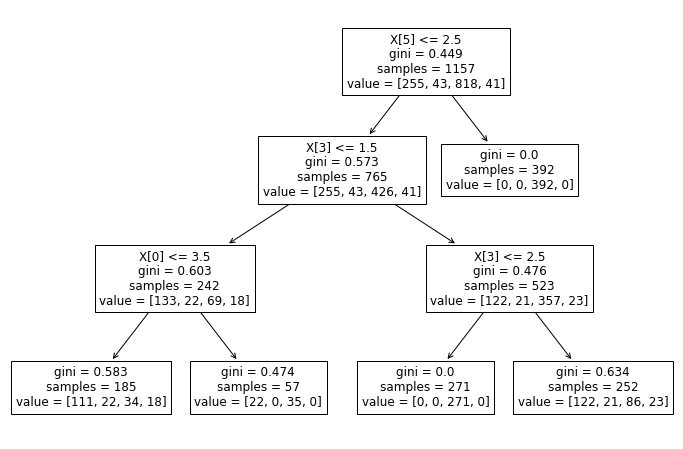

In [26]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train,y_train))

# Decision Tree Classifier with criterion entropy

In [28]:
#instiate The Decision tree classifer model with criterion entropy

clf_en=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=3)

#fit the model
clf_en.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=3)

# Predict the test result with criterion entropy

In [29]:
y_pred_en=clf_en.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

print('Model Accuracy score:{0:0.4f}'.format(accuracy_score(y_test,y_pred_en)))

Model Accuracy score:0.7461


# Compare the train-set and test-set accuracy score



In [31]:
y_pred_train_en=clf_en.predict(X_train)

y_pred_train_en

array(['acc', 'unacc', 'unacc', ..., 'unacc', 'unacc', 'unacc'],
      dtype=object)

In [32]:
print('Training test score:{0:0.4f}'.format(accuracy_score(y_train,y_pred_train_en)))

Training test score:0.7934


# Check for Overfitting the Underfitting

In [33]:
# print the score of train-set and test-set

print('Training set score:{:.4f}'.format(clf_en.score(X_train,y_train)))
print('Test set score:{:.4f}'.format(clf_en.score(X_test,y_test)))

Training set score:0.7934
Test set score:0.7461


# Visualize Decision tree


[Text(418.5, 380.52, 'X[5] <= 2.5\nentropy = 1.182\nsamples = 1157\nvalue = [255, 43, 818, 41]'),
 Text(334.8, 271.8, 'X[3] <= 1.5\nentropy = 1.458\nsamples = 765\nvalue = [255, 43, 426, 41]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.584\nsamples = 242\nvalue = [133, 22, 69, 18]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.657\nsamples = 118\nvalue = [67, 22, 13, 16]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.098\nsamples = 124\nvalue = [66, 0, 56, 2]'),
 Text(502.20000000000005, 163.07999999999998, 'X[3] <= 2.5\nentropy = 1.25\nsamples = 523\nvalue = [122, 21, 357, 23]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 271\nvalue = [0, 0, 271, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.65\nsamples = 252\nvalue = [122, 21, 86, 23]'),
 Text(502.20000000000005, 271.8, 'entropy = 0.0\nsamples = 392\nvalue = [0, 0, 392, 0]')]

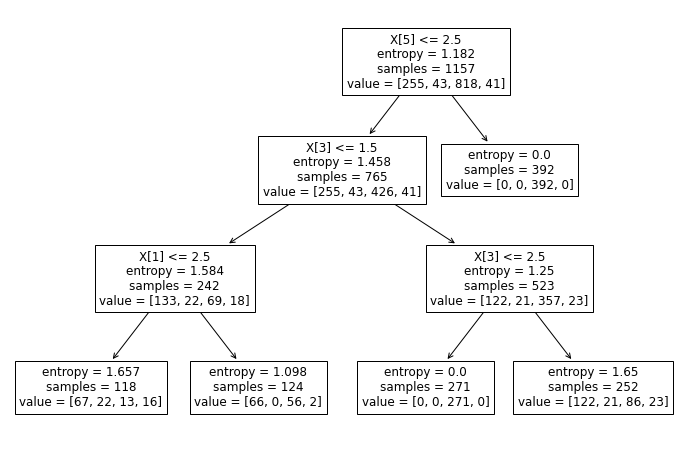

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(X_train,y_train))

# Visualize Decision tree

# Confusion Matrix

In [42]:
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test,y_pred_en)
print('Confusion matrix \n',cm)

Confusion matrix 
 [[129   0   0   0]
 [ 26   0   0   0]
 [ 95   0 297   0]
 [ 24   0   0   0]]


# Classification Report

In [45]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_en))

              precision    recall  f1-score   support

         acc       0.47      1.00      0.64       129
        good       0.00      0.00      0.00        26
       unacc       1.00      0.76      0.86       392
       vgood       0.00      0.00      0.00        24

    accuracy                           0.75       571
   macro avg       0.37      0.44      0.38       571
weighted avg       0.79      0.75      0.74       571



C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
